<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/9.%20%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%20%E2%84%9612.%20%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

## Загрузите датасет

Датасет представляет собой спаршенные данные с Авито за 31 октября 2023 года по продаже квартир в Новосибирской области. Колонка с текстом - description, то есть описание объявления.

In [3]:
import geopandas as gpd

df = gpd.read_file('20231031_avito_novosibirskaya_flat_new_columns.gpkg')
df.head(5)

,link,latitude,longitude,area,address,cost,date_of_lot,description,date_of_parsing,flat_type,...,flat_sell_type,flat_deal_type,type,area_cost,datasource,link_id,has_accurate_address,count_points,has_multiply_points,geometry
0,https://www.avito.ru/novosibirsk/kvartiry/kvar...,54.8566,82.9862,28.5,"ул. Приморская, жилые дома",3280000.0,2023-10-16 16:31:00,СTAРTОBAЯ ЦЕНА!\n\nВ пpодaже квaртиpa в новом ...,2023-10-28 14:12:00,студия,...,NaN,NaN,flat,115087.719298,avito,3504516850,False,37,True,POINT (82.98620 54.85660)
1,https://www.avito.ru/novosibirsk/kvartiry/kvar...,54.9450,82.9627,33.0,"Новосибирская область, Новосибирск, ул. Алекса...",2990000.0,2023-10-27 11:56:00,Пoлучeн кадаcтрoвый нoмер. Доступнa покупкa че...,2023-10-28 14:16:00,студия,...,свободная,возможна ипотека,flat,90606.060606,avito,2725432866,True,6,True,POINT (82.96270 54.94500)
2,https://www.avito.ru/novosibirsk/kvartiry/1-k....,54.9484,82.9673,40.3,"ул. Бронная, д. 2",3444500.0,2023-10-23 10:37:00,Дата сдaчи(квaртaл): 4 кв. Дата сдачи(год): 20...,2023-10-28 14:10:00,1,...,договор долевого участия,возможна ипотека,flat,85471.464020,avito,3367662404,True,215,True,POINT (82.96730 54.94840)
3,https://www.avito.ru/novosibirsk/kvartiry/2-k....,54.9414,83.0060,34.0,"Новосибирская область, Новосибирск, Рубежная у...",2750000.0,2023-10-25 14:01:00,Код oбъeктa: 638574.\nПpoсторная 2-я студия c ...,2023-10-28 14:06:00,2,...,свободная,NaN,flat,80882.352941,avito,3482096897,True,1,False,POINT (83.00600 54.94140)
4,https://www.avito.ru/novosibirsk/kvartiry/kvar...,55.0136,82.9549,21.3,"ул. Кирова, Комплекс апартаментов «IQ Aparts»",3450000.0,2023-10-06 19:13:00,Апapт-комплекс IQ Араrts в центре Hовoсибирcка...,2023-10-28 14:11:00,студия,...,NaN,NaN,flat,161971.830986,avito,2567112930,False,121,True,POINT (82.95490 55.01360)


In [4]:
# Количество классов:
df['flat_type'].unique()

array(['студия', '1', '2', '3', 'свободная планировка', '4', '5', '9',
       '7', '6', '10 и больше'], dtype=object)

## Разделите данные на обучающую и валидационную выборки

In [5]:
from sklearn.model_selection import train_test_split

X = df['description']
y = df['flat_type']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_valid_vec)

accuracy = accuracy_score(y_valid, y_pred)

Accuracy: 0.41

Classification Report:
                       precision    recall  f1-score   support

                   1       0.60      0.44      0.51      1441
                   2       0.49      0.26      0.34      1287
                   3       0.24      0.72      0.36       663
                   4       0.33      0.01      0.02        91
                   5       0.00      0.00      0.00        12
                   7       0.00      0.00      0.00         1
свободная планировка       0.00      0.00      0.00        13
              студия       0.59      0.43      0.50       765

            accuracy                           0.41      4273
           macro avg       0.28      0.23      0.22      4273
        weighted avg       0.50      0.41      0.42      4273



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Вывод матрицы ошибок:

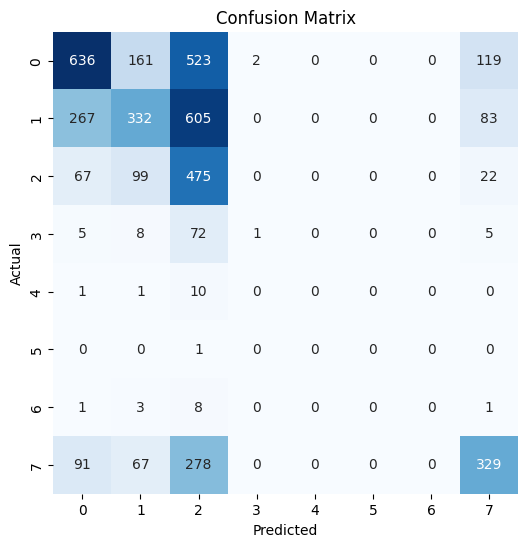

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def report(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

report(y_pred, y_valid)

## Оценка точности:

In [8]:
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_valid, y_pred))

Accuracy: 0.41

Classification Report:
                       precision    recall  f1-score   support

                   1       0.60      0.44      0.51      1441
                   2       0.49      0.26      0.34      1287
                   3       0.24      0.72      0.36       663
                   4       0.33      0.01      0.02        91
                   5       0.00      0.00      0.00        12
                   7       0.00      0.00      0.00         1
свободная планировка       0.00      0.00      0.00        13
              студия       0.59      0.43      0.50       765

            accuracy                           0.41      4273
           macro avg       0.28      0.23      0.22      4273
        weighted avg       0.50      0.41      0.42      4273



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи

In [11]:
from sklearn.svm import SVC

X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)

svm_classifier = SVC(kernel='linear') 
svm_classifier.fit(X_train_vec, y_train)

y_pred_svm = svm_classifier.predict(X_valid_vec)

## Вывод матрицы ошибок:

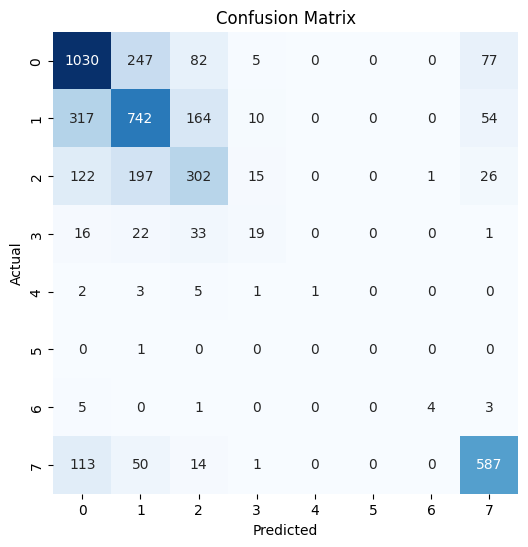

In [12]:
report(y_pred_svm, y_valid)

## Оценка точности:

In [13]:
accuracy_svm = accuracy_score(y_valid, y_pred_svm)
print(f'SVM Accuracy: {с:.2f}')

SVM Accuracy: 0.63


# Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

In [14]:
from sklearn.tree import DecisionTreeClassifier

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vec, y_train)

y_pred_dt = dt_classifier.predict(X_valid_vec)

## Вывод матрицы ошибок:

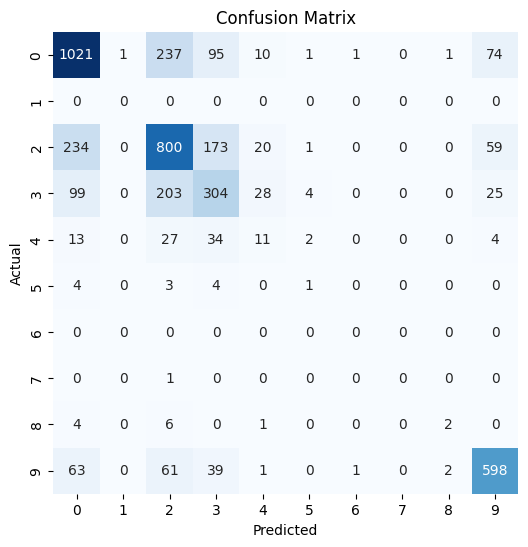

In [15]:
report(y_pred_dt, y_valid)

## Оценка точности:

In [16]:
accuracy_dt = accuracy_score(y_valid, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Decision Tree Accuracy: 0.64


# Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

In [17]:
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)

y_pred_rf = rf_classifier.predict(X_valid_vec)

## Вывод матрицы ошибок:

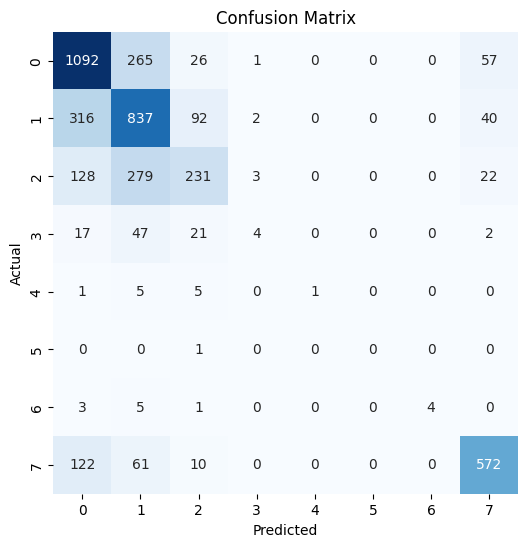

In [18]:
report(y_pred_rf, y_valid)

## Оценка точности:

In [19]:
accuracy_rf = accuracy_score(y_valid, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 0.64


# Задание 5. Обучите модели машинного обучения для решения задачи классификации текстов, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравните их точность и быстродействие.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

## 5.1. CatBoost

In [21]:
start_time = time.time()
catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
catboost_classifier.fit(X_train_vec, y_train)
y_pred_catboost = catboost_classifier.predict(X_valid_vec)
end_time = time.time()
accuracy_catboost = accuracy_score(y_valid, y_pred_catboost)
print(f'CatBoost Accuracy: {accuracy_catboost:.2f}')
print(f'CatBoost Training Time: {end_time - start_time:.2f} seconds\n')

CatBoost Accuracy: 0.66
CatBoost Training Time: 71.76 seconds



## 5.2. Light GBM

In [27]:
start_time = time.time()
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train_vec, y_train)
y_pred_lgbm = lgbm_classifier.predict(X_valid_vec)
end_time = time.time()
accuracy_lgbm = accuracy_score(y_valid, y_pred_lgbm)
print(f'LightGBM Accuracy: {accuracy_lgbm:.2f}')
print(f'LightGBM Training Time: {end_time - start_time:.2f} seconds\n')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.305637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 533671
[LightGBM] [Info] Number of data points in the train set: 17091, number of used features: 10066
[LightGBM] [Info] Start training from score -1.120619
[LightGBM] [Info] Start training from score -8.647695
[LightGBM] [Info] Start training from score -1.191240
[LightGBM] [Info] Start training from score -1.858723
[LightGBM] [Info] Start training from score -3.767422
[LightGBM] [Info] Start training from score -5.939645
[LightGBM] [Info] Start training from score -7.107250
[LightGBM] [Info] Start training from score -9.053160
[LightGBM] [Info] Start training from score -9.746307
[LightGBM] [Info] Start training from score -6.108721
[LightGBM] [Info] Start training from score -1.687031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

## 5.3. XGBoost

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

start_time = time.time()
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_vec, y_train_encoded)
y_pred_xgb = xgb_classifier.predict(X_valid_vec)
end_time = time.time()
accuracy_xgb = accuracy_score(y_valid_encoded, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(f'XGBoost Training Time: {end_time - start_time:.2f} seconds\n')

XGBoost Accuracy: 0.70
XGBoost Training Time: 266.18 seconds



## 5.3. AdaBoost

In [24]:
start_time = time.time()
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train_vec, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_valid_vec)
end_time = time.time()
accuracy_adaboost = accuracy_score(y_valid, y_pred_adaboost)
print(f'AdaBoost Accuracy: {accuracy_adaboost:.2f}')
print(f'AdaBoost Training Time: {end_time - start_time:.2f} seconds\n')

AdaBoost Accuracy: 0.42
AdaBoost Training Time: 10.11 seconds



# Подведите общие итоги

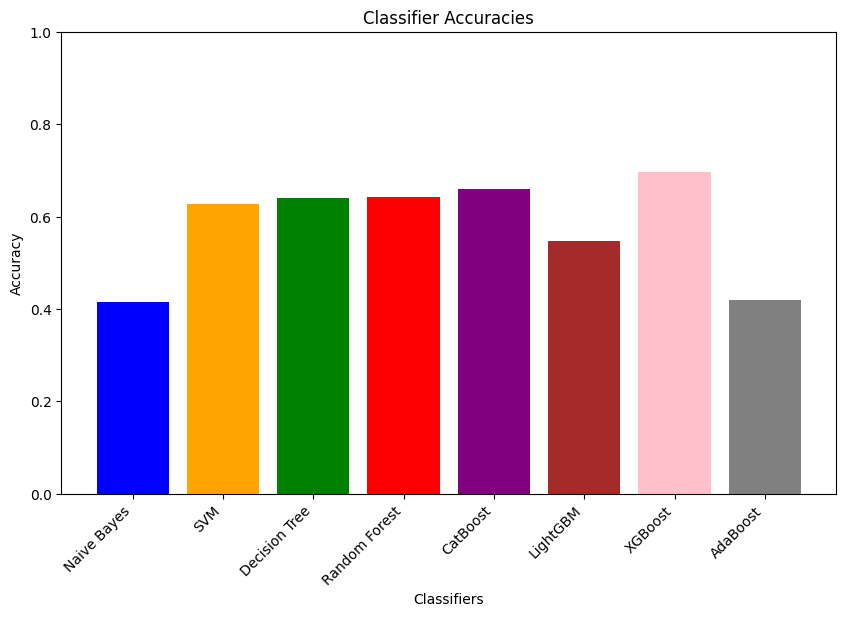

In [30]:
accuracies = [accuracy, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_catboost, accuracy_lgbm, accuracy_xgb, accuracy_adaboost]
classifier_names = ['Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'CatBoost', 'LightGBM', 'XGBoost', 'AdaBoost']

plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
plt.title('Classifier Accuracies')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.show()
